<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/5)_A)_ON_OxCGRT_Policy_Indices_Dataset_Transformation_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OxCGRT Policy Tracker Indices Data 

####this step comes after tweet EDA in case the dataset is too small or skewed to use

In [ ]:
# import essential packages
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
# Mounting google colab on drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Importing most recent covid-19 policy tracker data from Oxford's Covid-19 Policy Tracker Github Project 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_latest.csv') 

# Filtering data to just Canada
Filter_to_Canada = data['CountryName'] == 'Canada'
data_Canada = data[Filter_to_Canada]

# Creating a dataset with just Canada'national total 
Filter_to_National = data_Canada['Jurisdiction'] == 'NAT_TOTAL'
data_Canada2 = data_Canada[Filter_to_National]

# Creating a dataset with Ontario's sub-national totals 
Filter_to_Ontario = data_Canada['RegionName'] == 'Ontario'
data_Ontario = data_Canada[Filter_to_Ontario] 

# Filtering Ontario further to just state_totals (which will give me all the policies in effect at the provincial level)
filter_to_state_total = data_Ontario['Jurisdiction'] == 'STATE_TOTAL'
data_Ontario2 = data_Ontario[filter_to_state_total]

# looking at the data values of the datasets below, date is a int dtype so I will convert both dataset values to datetime objects to better filter needed dates 
data_Ontario2.info(), data_Canada2.info()

In [ ]:
# Converting the date field to a datetime dtype for better management down the road
data_Ontario2['Date'] = data_Ontario2['Date'].astype(str) # strptime only parses from a string dtype 

Date_c = [] 

for t in data_Ontario2['Date']:
  Date_c.append(datetime.strptime(t, '%Y%m%d'))

data_Ontario2['Date'] = Date_c # overwriting the column with datetime values 

In [ ]:
data_Ontario2['Date'].head(3), data_Ontario2['Date'].tail(3) # The output should be Jan 1s, 2020 to July 4th, 2021 (when i read the data in)

(35264   2020-01-01
 35265   2020-01-02
 35266   2020-01-03
 Name: Date, dtype: datetime64[ns], 35812   2021-07-02
 35813   2021-07-03
 35814   2021-07-04
 Name: Date, dtype: datetime64[ns])

In [ ]:
# Also have to convert the date field for the national level dataset 
data_Canada2['Date'] = data_Canada2['Date'].astype(str) 

Date_cl = [] 

for t in data_Canada2['Date']:
  Date_cl.append(datetime.strptime(t, '%Y%m%d'))

data_Canada2['Date'] = Date_cl

In [ ]:
data_Canada2['Date'].head(3), data_Canada2['Date'].tail(3) # The output should be Jan 1s, 2020 to July 4th, 2021 (when i read the data in)

(38019   2020-01-01
 38020   2020-01-02
 38021   2020-01-03
 Name: Date, dtype: datetime64[ns], 38567   2021-07-02
 38568   2021-07-03
 38569   2021-07-04
 Name: Date, dtype: datetime64[ns])

In [ ]:
# Finally, only March 1st, 2020 to June 1st, 2021 is needed so I'm just going to slice the data
policy_indices_Ontario = data_Ontario2[60:517]
policy_indices_Canada = data_Canada2[60:517]

Basic dataset cleaning is finished - now I will visualize the data 

In [ ]:
policy_indices_Ontario.head(3)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
35324,Canada,CAN,Ontario,CAN_ON,STATE_TOTAL,2020-03-01,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,15.0,0.0,13.89,13.89,19.05,19.05,14.06,14.06,16.07,16.07,0.0,0.0
35325,Canada,CAN,Ontario,CAN_ON,STATE_TOTAL,2020-03-02,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,13.89,13.89,19.05,19.05,14.06,14.06,16.07,16.07,0.0,0.0
35326,Canada,CAN,Ontario,CAN_ON,STATE_TOTAL,2020-03-03,0.0,NaN,0.0,NaN,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,20.0,0.0,13.89,13.89,19.05,19.05,14.06,14.06,16.07,16.07,0.0,0.0


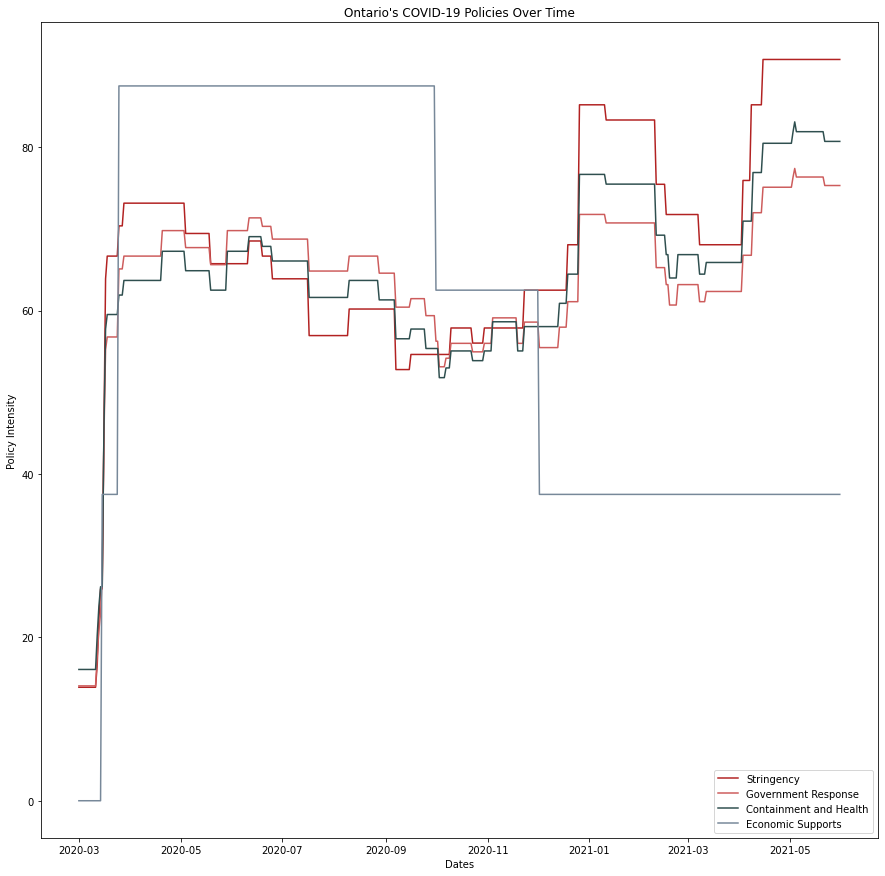

In [ ]:
import matplotlib.colors as mcolors

date_ON = policy_indices_Ontario['Date']
date_CAN = policy_indices_Canada['Date']
stringency_ON = policy_indices_Ontario['StringencyIndex']
stringency_CAN = policy_indices_Canada['StringencyIndex']
gov_response_ON = policy_indices_Ontario['GovernmentResponseIndex']
gov_response_CAN = policy_indices_Canada['GovernmentResponseIndex']
containment_health_ON = policy_indices_Ontario['ContainmentHealthIndex']
containment_health_CAN = policy_indices_Canada['ContainmentHealthIndex']
economic_supports_ON = policy_indices_Ontario['EconomicSupportIndex']
economic_supports_CAN = policy_indices_Canada['EconomicSupportIndex']

plt.plot(date_ON, stringency_ON, color = 'firebrick', label = 'Stringency')
plt.plot(date_ON, gov_response_ON, color = 'indianred', label = 'Government Response')
plt.plot(date_ON, containment_health_ON, color = 'darkslategrey', label = 'Containment and Health')
plt.plot(date_ON, economic_supports_ON, color = 'lightslategrey', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Policy Intensity")
plt.title("Ontario's COVID-19 Policies Over Time")
plt.legend()
plt.rc('figure', figsize=(20,20))
plt.show()

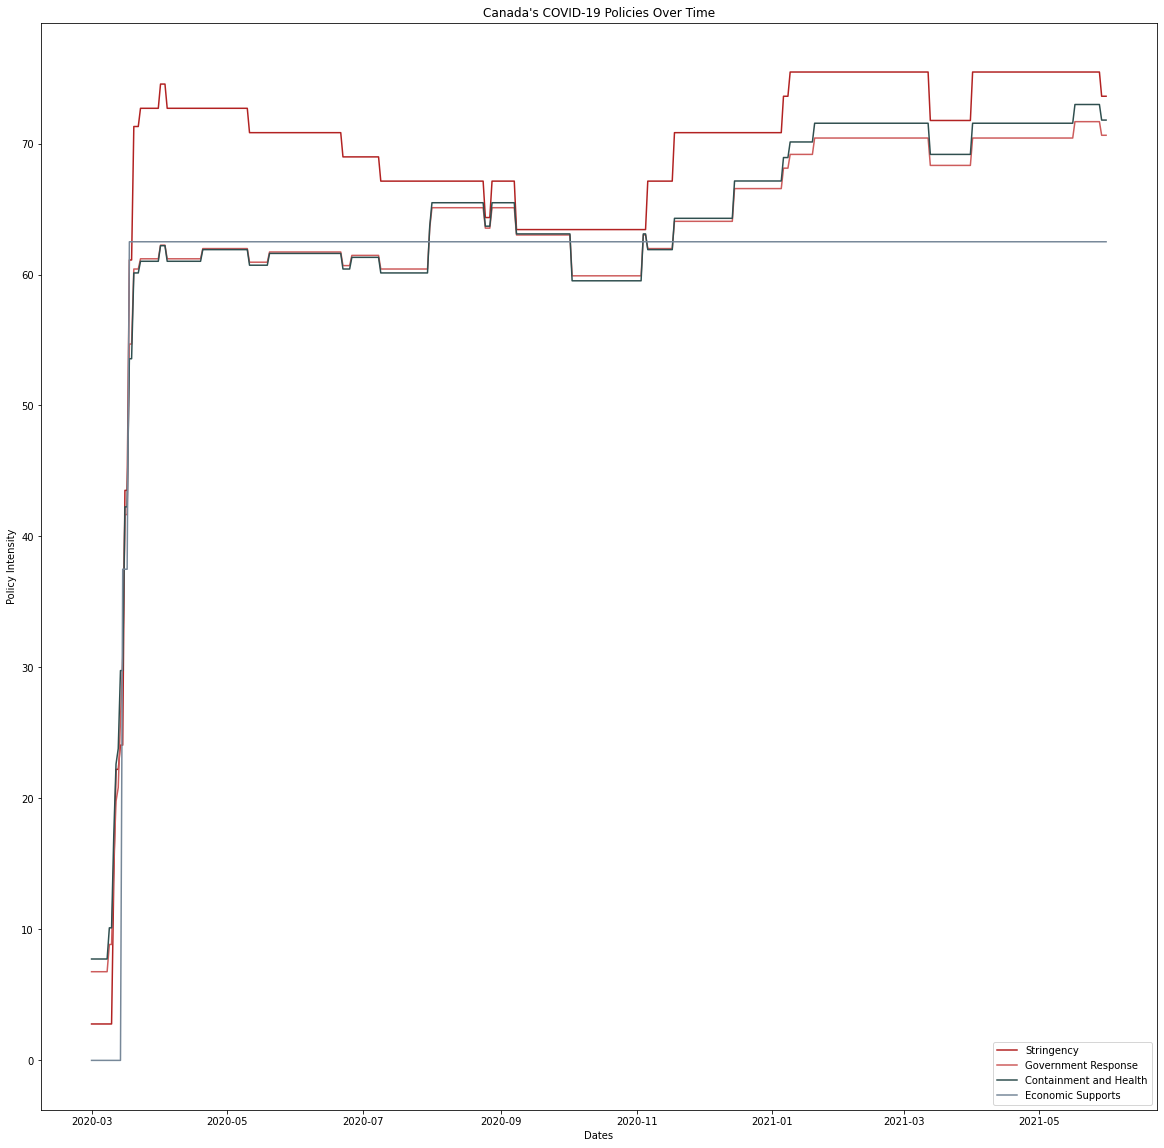

In [ ]:
date_CAN = policy_indices_Canada['Date']
stringency_CAN = policy_indices_Canada['StringencyIndex']
gov_response_CAN = policy_indices_Canada['GovernmentResponseIndex']
containment_health_CAN = policy_indices_Canada['ContainmentHealthIndex']
economic_supports_CAN = policy_indices_Canada['EconomicSupportIndex']

plt.plot(date_CAN, stringency_CAN, color = 'firebrick', label = 'Stringency')
plt.plot(date_CAN, gov_response_CAN, color = 'indianred', label = 'Government Response')
plt.plot(date_CAN, containment_health_CAN, color = 'darkslategrey', label = 'Containment and Health')
plt.plot(date_CAN, economic_supports_CAN, color = 'lightslategrey', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Policy Intensity")
plt.title("Canada's COVID-19 Policies Over Time")
plt.legend()
plt.rc('figure', figsize=(20,20))
plt.show()

These results make sense - at the provincial level there is a lot more variation across topic groups as provinces were endowed with a lot of policy flexibility throughout the pandemic. Whereas the federal government tackled things that are strictly fed jurisdiction - for example, foreign travel and vaccine procurement. 

In [ ]:
# Finally we will look at Ontario and Canada policies timeline together



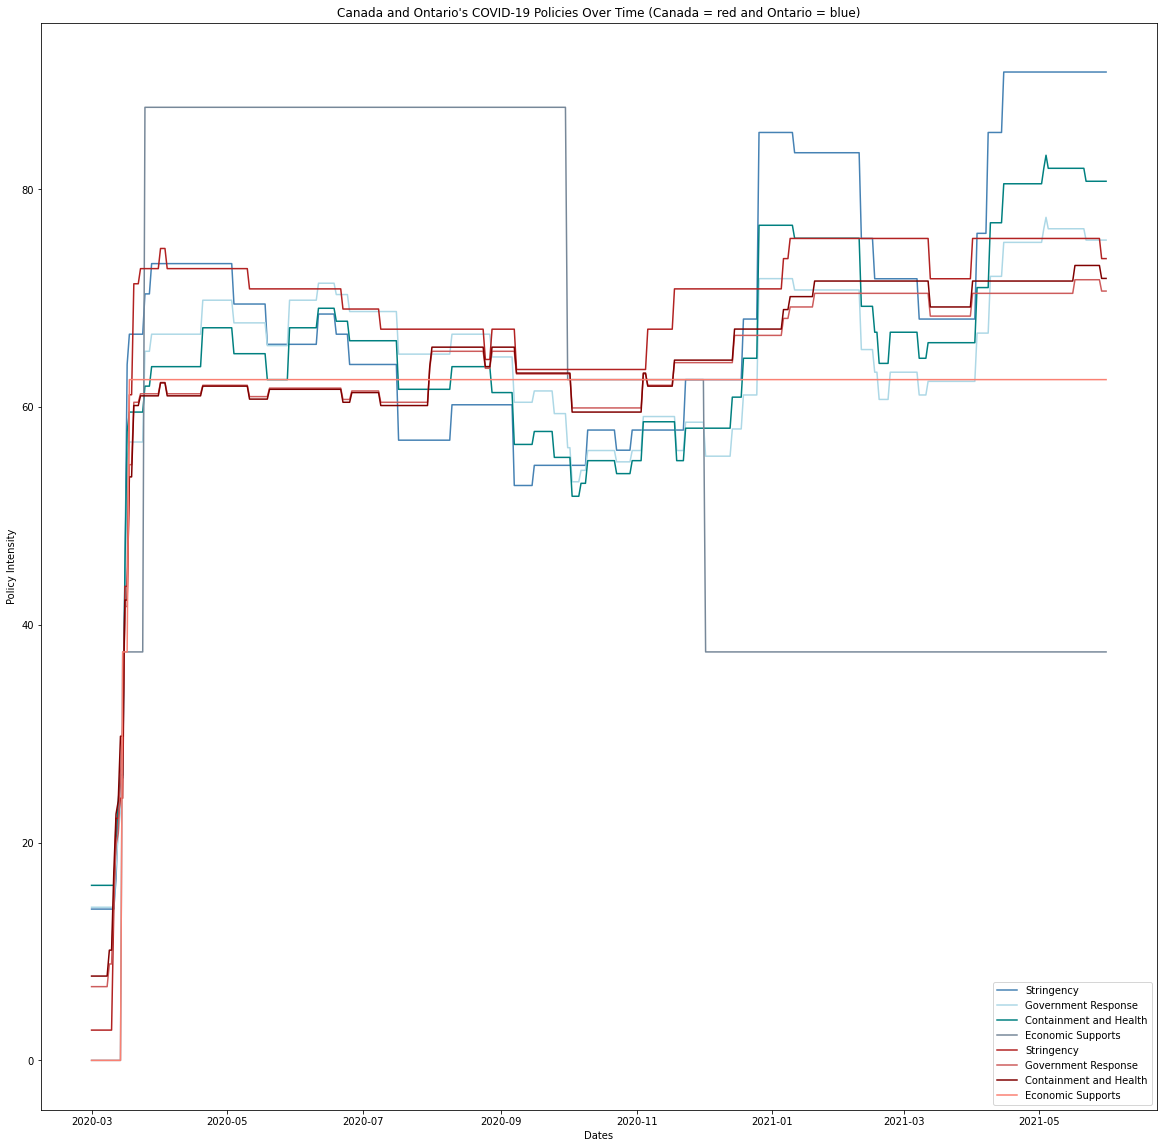

In [ ]:
date_ON = policy_indices_Ontario['Date']
date_CAN = policy_indices_Canada['Date']
date_ON = policy_indices_Ontario['Date']
date_CAN = policy_indices_Canada['Date']
stringency_ON = policy_indices_Ontario['StringencyIndex']
stringency_CAN = policy_indices_Canada['StringencyIndex']
gov_response_ON = policy_indices_Ontario['GovernmentResponseIndex']
gov_response_CAN = policy_indices_Canada['GovernmentResponseIndex']
containment_health_ON = policy_indices_Ontario['ContainmentHealthIndex']
containment_health_CAN = policy_indices_Canada['ContainmentHealthIndex']
economic_supports_ON = policy_indices_Ontario['EconomicSupportIndex']
economic_supports_CAN = policy_indices_Canada['EconomicSupportIndex']

plt.plot(date_ON, stringency_ON, color = 'steelblue', label = 'Stringency')
plt.plot(date_ON, gov_response_ON, color = 'lightblue', label = 'Government Response')
plt.plot(date_ON, containment_health_ON, color = 'teal', label = 'Containment and Health')
plt.plot(date_ON, economic_supports_ON, color = 'lightslategrey', label = 'Economic Supports')

plt.plot(date_CAN, stringency_CAN, color = 'firebrick', label = 'Stringency')
plt.plot(date_CAN, gov_response_CAN, color = 'indianred', label = 'Government Response')
plt.plot(date_CAN, containment_health_CAN, color = 'maroon', label = 'Containment and Health')
plt.plot(date_CAN, economic_supports_CAN, color = 'salmon', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Policy Intensity")
plt.title("Canada and Ontario's COVID-19 Policies Over Time (Canada = red and Ontario = blue)")
plt.legend()
plt.rc('figure', figsize=(20,20))
plt.show()

In [ ]:
# now that the Oxford Government Tracker Data has been filtered down to needed information - I will save it back to my drive
policy_indices_Ontario.to_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_Ontario.csv')
policy_indices_Canada.to_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_Canada.csv')